# Getting started

The following code block will attempt install all of the necessary packages required for 
these exercises. We assume that any neuroimaging tools required are already installed or
Docker or Singularity is avaialble for use.

In [1]:
!uv pip install -q \
  'nibabel' \
  'niwrap' \
  'nilearn[plotting]'

`Niwrap` has a number of a "Runners" to for executing neuroimaging tools - select the 
runner of choice to additional steps for setting up the runner!

1. Local installations (**default** - nothing needs to be done)
2. [DockerRunner](#Docker-Runner)
3. [SingularityRunner](#Singularity-Runner)

## Runner Setup

### Local Runner

You don't need to do anything - this is the default runner that is used. It will attempt to use installations found on the system.

### Docker Runner 
_**Skip this if using local installation or Singularity**_

While downloading containers when using the Docker runner isn't strictly necessary (containers are pulled automatically by the runner), we will do so here before attempting 
any exercises to minimize having to wait for containers to be pulled later on.

In [2]:
%%bash

docker pull antsx/ants:v2.5.3 -q
# docker pull brainlife/fsl:6.0.4-patched2 -q # Uncomment to download large (7GB) container

docker.io/antsx/ants:v2.5.3


We will also set `niwrap` to use the DockerRunner!

In [3]:
import niwrap

niwrap.use_docker()

### Singularity Runner 
_**Skip this if using local installation or Docker**_

Downloading containers is required when using the Singularity runner. Additionally,
we will need to tell our runner where we can find these containers after they have been
downloaded!

In [23]:
%%bash

mkdir -p ../containers
singularity pull ../containers/fsl_6.0.4-patched2.sif docker://brainlife/fsl:6.0.4-patched2
singularity pull ../containers/ants_v2.5.3.sif docker://antsx/ants:v2.5.3

bash: line 3: singularity: command not found
bash: line 4: singularity: command not found


CalledProcessError: Command 'b'\nmkdir -p ../containers\nsingularity pull ../containers/fsl_6.0.4-patched2.sif docker://brainlife/fsl:6.0.4-patched2\nsingularity pull ../containers/ants_v2.5.3.sif docker://antsx/ants:v2.5.3\n'' returned non-zero exit status 127.

In [ ]:
from pathlib import Path

import niwrap

niwrap.use_singularity(
    images={
        "brainlife/fsl:6.0.4-patched2": Path("../containers/fsl_6.0.4-patched2.sif").resolve()
    }
)

## Exercises 

In the following exercises, we will use a combination of commonly used neuroimaging 
Python libraries and tools to perform a number of different processing tasks. Let's 
first take a look at what our data folder looks like!

In [4]:
!tree `realpath ../data`

/home/jkai/repository/cmi/niwrap-workshop/data
├── tpl-MNI152NLin2009cAsym_res-02_T1w.nii.gz
├── tpl-MNI152NLin6Asym_from-MNI152NLin2009cAsym_mode-image_xfm.mat
├── tpl-MNI152NLin6Asym_res-02_desc-brain_mask.nii.gz
└── tpl-MNI152NLin6Asym_res-02_T1w.nii.gz

0 directories, 4 files


As you can see, we will be using some MNI template data in different spaces.

### Example

Before we actually start doing things, lets take a look at some features of `niwrap`. 
All supported neuroimaging tools are available as a sub-module of `niwrap` - that is
we can follow the `from niwrap import ...` syntax!

Let's try and load in the `FSL` sub-module and figure out what commands are available! 

In [5]:
from niwrap import fsl

In [ ]:
# Autocomplete is available!
fsl.

What if we want to execute a command let `bet` for brain extraction, but can't remember
the parameters?

In [6]:
# All of the docstrings have also been extracted and made available, along with type hints!
help(fsl.bet)

Help on function bet in module niwrap_fsl.fsl.bet:

bet(
    infile: pathlib._local.Path | str,
    maskfile: str = 'img_bet',
    fractional_intensity: float | None = None,
    vg_fractional_intensity: float | None = None,
    center_of_gravity: list[float] | None = None,
    overlay: bool = False,
    binary_mask: bool = False,
    approx_skull: bool = False,
    no_seg_output: bool = False,
    vtk_mesh: bool = False,
    head_radius: float | None = None,
    thresholding: bool = False,
    robust_iters: bool = False,
    residual_optic_cleanup: bool = False,
    reduce_bias: bool = False,
    slice_padding: bool = False,
    whole_set_mask: bool = False,
    additional_surfaces: bool = False,
    additional_surfaces_t2: pathlib._local.Path | str | None = None,
    verbose: bool = False,
    debug: bool = False,
    runner: styxdefs.types.Runner | None = None
) -> niwrap_fsl.fsl.bet.BetOutputs
    Automated brain extraction tool for FSL.

    Author: FMRIB Analysis Group, University

In this example, we will use [FSL](https://fsl.fmrib.ox.ac.uk/fsl/docs/#/) to perform brain extraction on the T1w image in MNI152NLin2009cAsym space.

In [7]:
# We'll first grab our file
from pathlib import Path

data_dir = Path("../data").resolve()
if not data_dir.exists():
    raise FileNotFoundError("Data directory could not be found.")

mni2009c = data_dir / "tpl-MNI152NLin2009cAsym_res-02_T1w.nii.gz"

In [8]:
# Start with importing fsl
from niwrap import fsl

'''
bet ../data/tpl-MNI152NLin2009cAsym_res-02_T1w.nii.gz out -f 0.7
'''
bet = fsl.bet(infile=mni2009c, fractional_intensity=0.7)

[D] Running docker: docker run --rm -u 1000 -w /styx_output --mount type=bind,source=/home/jkai/repository/cmi/niwrap-workshop/data/tpl-MNI152NLin2009cAsym_res-02_T1w.nii.gz,target=/styx_input/0/tpl-MNI152NLin2009cAsym_res-02_T1w.nii.gz,readonly --mount type=bind,source=/home/jkai/repository/cmi/niwrap-workshop/notebooks/styx_tmp/fff6119bfe917741_0_bet,target=/styx_output --entrypoint /bin/bash brainlife/fsl:6.0.4-patched2 ./run.sh
[D] Running command: bet /styx_input/0/tpl-MNI152NLin2009cAsym_res-02_T1w.nii.gz img_bet -f 0.7
[I] Executed fsl bet in 0:00:03.066247


In [9]:
print(bet.outfile)

styx_tmp/fff6119bfe917741_0_bet/img_bet.nii.gz


For some tools, a default output file name is already provided. You can also overwrite the output file name (we'll see this in a later example). Let's visualize what this looks like!

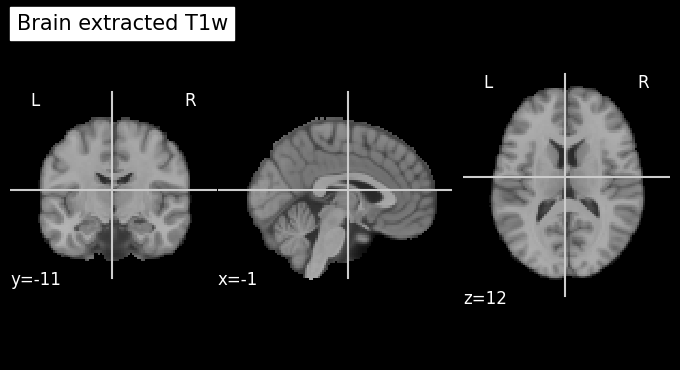

In [10]:
from nilearn import plotting

plotting.plot_anat(
    bet.outfile,
    title="Brain extracted T1w"
)
plotting.show()

### Exercise 1

For our first task, we will perform a slightly more complicated task using [ANTs](https://github.com/ANTsX/ANTs) to transform `tpl-MNI152NLin6Asym` to `MNI152NLin2009cAsym`. Again, all of the necessary data to do this is already available!

In [11]:
# We'll first get grab all our input variables
from pathlib import Path

data_dir = Path("../data").resolve()
if not data_dir.exists():
    raise FileNotFoundError("Data directory could not be found.")

t1w = data_dir / "tpl-MNI152NLin6Asym_res-02_T1w.nii.gz"
mask = data_dir / "tpl-MNI152NLin6Asym_res-02_desc-brain_mask.nii.gz"
xfm = data_dir / "tpl-MNI152NLin6Asym_from-MNI152NLin2009cAsym_mode-image_xfm.mat"
ref = data_dir / "tpl-MNI152NLin2009cAsym_res-02_T1w.nii.gz"

In [12]:
# Start by trying to import ants
from niwrap import ants 

We know we need the command `antsApplyTransforms`, but we don't know what equivalent call
is in `niwrap` nor the parameters that need to provided.

In [13]:
# Try the autocomplete feature, as well as printing out the help
help(ants.ants_apply_transforms)

Help on function ants_apply_transforms in module niwrap_ants.ants.ants_apply_transforms:

ants_apply_transforms(
    input_image: pathlib._local.Path | str,
    reference_image: pathlib._local.Path | str,
    output: Union[niwrap_ants.ants.ants_apply_transforms.AntsApplyTransformsWarpedOutputParameters, niwrap_ants.ants.ants_apply_transforms.AntsApplyTransformsCompositeDisplacementFieldOutputParameters, niwrap_ants.ants.ants_apply_transforms.AntsApplyTransformsGenericAffineTransformOutputParameters],
    dimensionality: Optional[Literal[2, 3, 4]] = None,
    input_image_type: Optional[Literal[0, 1, 2, 3, 4, 5]] = None,
    interpolation: Union[niwrap_ants.ants.ants_apply_transforms.AntsApplyTransformsLinearParameters, niwrap_ants.ants.ants_apply_transforms.AntsApplyTransformsNearestNeighborParameters, niwrap_ants.ants.ants_apply_transforms.AntsApplyTransformsMultiLabelnoparamsParameters, niwrap_ants.ants.ants_apply_transforms.AntsApplyTransformsMultiLabelParameters, niwrap_ants.ants.an

Let's start by applying our transformation to the T1w.

In [14]:
# Note this uses what is known as 'sub-commands' in niwrap
'''
antsApplyTransforms \
  --dimensionality 3 \
  --input-image-type 0 \
  --input ../data/tpl-MNI152NLin6Asym_res-02_T1w.nii.gz \
  --reference-image ../data/tpl-MNI152NLin2009cAsym_res-02_T1w.nii.gz \
  --output tpl-MNI152NLin6Asym_space-MNI152NLin2009cAsym_res-02_T1w.nii.gz \
  --interpolation Linear \
  --transform ../data/tpl-MNI152NLin6Asym_from-MNI152NLin2009cAsym_mode-image_xfm.mat
'''
t1w_mni2009c = ants.ants_apply_transforms(
    input_image=t1w,
    reference_image=ref,
    output=ants.ants_apply_transforms_warped_output_params("tpl-MNI152NLin6Asym_space-MNI152NLin2009cAsym_res-02_T1w.nii.gz"),
    transform=[ants.ants_apply_transforms_transform_file_name_params(xfm)],
    interpolation=ants.ants_apply_transforms_linear_params(),
    dimensionality=3,
    input_image_type=0,
)

[D] Running docker: docker run --rm -u 1000 -w /styx_output --mount type=bind,source=/home/jkai/repository/cmi/niwrap-workshop/data/tpl-MNI152NLin6Asym_res-02_T1w.nii.gz,target=/styx_input/0/tpl-MNI152NLin6Asym_res-02_T1w.nii.gz,readonly --mount type=bind,source=/home/jkai/repository/cmi/niwrap-workshop/data/tpl-MNI152NLin2009cAsym_res-02_T1w.nii.gz,target=/styx_input/1/tpl-MNI152NLin2009cAsym_res-02_T1w.nii.gz,readonly --mount type=bind,source=/home/jkai/repository/cmi/niwrap-workshop/data/tpl-MNI152NLin6Asym_from-MNI152NLin2009cAsym_mode-image_xfm.mat,target=/styx_input/2/tpl-MNI152NLin6Asym_from-MNI152NLin2009cAsym_mode-image_xfm.mat,readonly --mount type=bind,source=/home/jkai/repository/cmi/niwrap-workshop/notebooks/styx_tmp/fff6119bfe917741_1_antsApplyTransforms,target=/styx_output --entrypoint /bin/bash antsx/ants:v2.5.3 ./run.sh
[D] Running command: antsApplyTransforms --dimensionality 3 --input-image-type 0 --input /styx_input/0/tpl-MNI152NLin6Asym_res-02_T1w.nii.gz --referenc

Try applying the transformation to the mask as well!

In [15]:
'''
antsApplyTransforms \
  --dimensionality 3 \
  --input-image-type 0 \
  --input ../data/tpl-MNI152NLin6Asym_res-02_desc-brain_mask.nii.gz \
  --reference-image ../data/tpl-MNI152NLin2009cAsym_res-02_T1w.nii.gz \
  --output tpl-MNI152NLin6Asym_space-MNI152NLin2009cAsym_res-02_T1w.nii.gz \
  --interpolation NearestNeighbor \
  --transform ../data/tpl-MNI152NLin6Asym_from-MNI152NLin2009cAsym_mode-image_xfm.mat
'''
mask_mni2009c = ants.ants_apply_transforms(
    input_image=mask,
    reference_image=ref,
    output=ants.ants_apply_transforms_warped_output_params("tpl-MNI152NLin6Asym_space-MNI152NLin2009cAsym_res-02_T1w.nii.gz"),
    transform=[ants.ants_apply_transforms_transform_file_name_params(xfm)],
    interpolation=ants.ants_apply_transforms_nearest_neighbor_params(),
    dimensionality=3,
    input_image_type=0,
)

[D] Running docker: docker run --rm -u 1000 -w /styx_output --mount type=bind,source=/home/jkai/repository/cmi/niwrap-workshop/data/tpl-MNI152NLin6Asym_res-02_desc-brain_mask.nii.gz,target=/styx_input/0/tpl-MNI152NLin6Asym_res-02_desc-brain_mask.nii.gz,readonly --mount type=bind,source=/home/jkai/repository/cmi/niwrap-workshop/data/tpl-MNI152NLin2009cAsym_res-02_T1w.nii.gz,target=/styx_input/1/tpl-MNI152NLin2009cAsym_res-02_T1w.nii.gz,readonly --mount type=bind,source=/home/jkai/repository/cmi/niwrap-workshop/data/tpl-MNI152NLin6Asym_from-MNI152NLin2009cAsym_mode-image_xfm.mat,target=/styx_input/2/tpl-MNI152NLin6Asym_from-MNI152NLin2009cAsym_mode-image_xfm.mat,readonly --mount type=bind,source=/home/jkai/repository/cmi/niwrap-workshop/notebooks/styx_tmp/fff6119bfe917741_2_antsApplyTransforms,target=/styx_output --entrypoint /bin/bash antsx/ants:v2.5.3 ./run.sh
[D] Running command: antsApplyTransforms --dimensionality 3 --input-image-type 0 --input /styx_input/0/tpl-MNI152NLin6Asym_res-

Let's take a look at the outputs!

<!-- Look at folder and at variables -->

In [16]:
print(f"'t1w_mni2009c': {t1w_mni2009c.output}\n")
print(f"'mask_mni2009c': {mask_mni2009c.output}")

't1w_mni2009c': AntsApplyTransformsWarpedOutputOutputs(root=PosixPath('styx_tmp/fff6119bfe917741_1_antsApplyTransforms'), output_image_outfile=PosixPath('styx_tmp/fff6119bfe917741_1_antsApplyTransforms/tpl-MNI152NLin6Asym_space-MNI152NLin2009cAsym_res-02_T1w.nii.gz'))

'mask_mni2009c': AntsApplyTransformsWarpedOutputOutputs(root=PosixPath('styx_tmp/fff6119bfe917741_2_antsApplyTransforms'), output_image_outfile=PosixPath('styx_tmp/fff6119bfe917741_2_antsApplyTransforms/tpl-MNI152NLin6Asym_space-MNI152NLin2009cAsym_res-02_T1w.nii.gz'))


We'll also try to plot this visually!

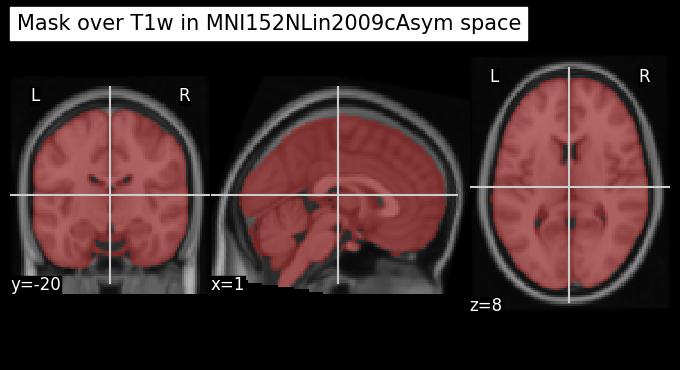

In [17]:
from nilearn import plotting

plotting.plot_roi(
    mask_mni2009c.output.output_image_outfile,
    bg_img=t1w_mni2009c.output.output_image_outfile,
    alpha=0.3,
    cmap='autumn',
    title="Mask over T1w in MNI152NLin2009cAsym space"
)
plotting.show()

Just to double check, lets overlay the mask on the original T1w image to make sure the 
transformation actually occurred!

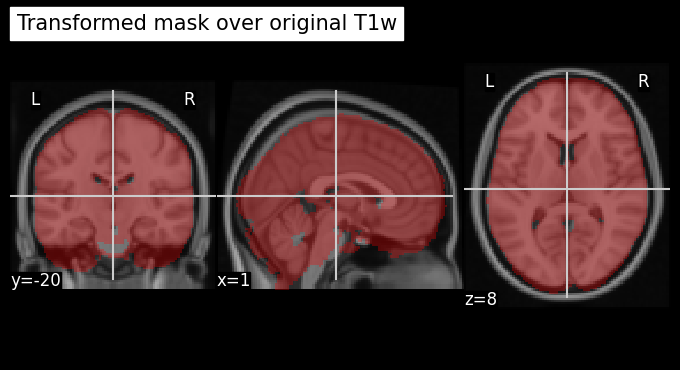

In [18]:
plotting.plot_roi(
    mask_mni2009c.output.output_image_outfile,
    bg_img=t1w,
    alpha=0.3,
    cmap='autumn',
    title="Transformed mask over original T1w"
)
plotting.show()

The differences are subtle, but yes, a transformation did indeed happen!

### Exercise 3

While there are many brain extraction tools (that we could again use to highlight 
`niwrap`), lets do something different. Instead of using an existing tool, lets use the 
data we transformed from [Example 2](#Example-2) and apply the mask. We'll do all this
exclusively using Python libraries!

In [19]:
import nibabel as nib 
import numpy as np

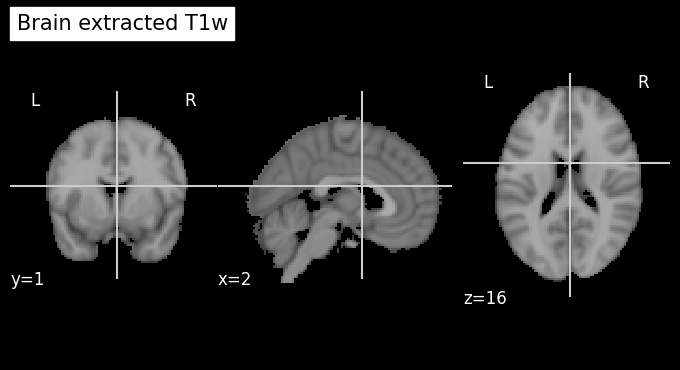

In [20]:
t1w_nii = nib.load(t1w_mni2009c.output.output_image_outfile)
mask_nii = nib.load(mask_mni2009c.output.output_image_outfile)

brain_arr = t1w_nii.get_fdata() * mask_nii.get_fdata()
brain_nii = nib.Nifti1Image(dataobj=brain_arr, affine=t1w_nii.affine)

plotting.plot_anat(
    brain_nii,
    title="Brain extracted T1w"
)
plotting.show()

While we treated these tasks as separate exercises, you could combine
exercises 2 and 3 together to create a short pipeline, performing
all of your tasks within Python!

### Exercise 4

As an additional exercise / challenge, try to play around with `niwrap` to create your own pipeline or use it on your own data!